In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
df = pd.read_csv(r"Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
le = LabelEncoder()
df['Species']= le.fit_transform(df['Species'])
df['Species'].unique()

array([0, 1, 2])

In [5]:
X=df.iloc[:,:4]
y=df.iloc[:,4:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123)

# Use K-MEANS

In [6]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_prediction=kmeans.predict(X_test)

e:\github\ML-LAB\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
print('The Accuracy Score Of K-Mean Algorithm: ', accuracy_score(y_test,y_prediction))

The Accuracy Score Of K-Mean Algorithm:  0.24444444444444444


In [8]:
class_names=["Iris-setosa","Iris-virginica","Iris-versicolor"]
print(confusion_matrix(y_test, y_prediction))

[[ 0 18  0]
 [10  0  0]
 [ 6  0 11]]


e:\github\ML-LAB\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[]

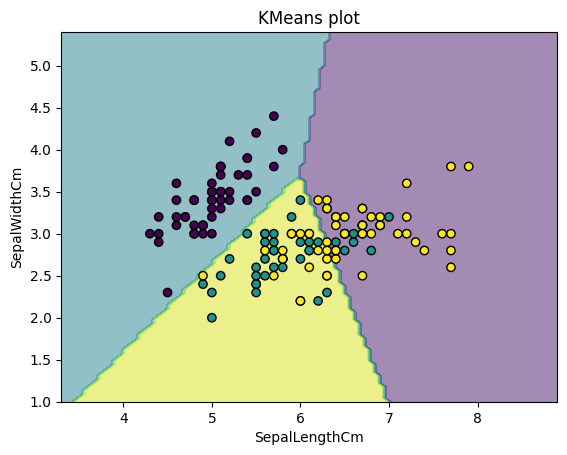

In [9]:
x=df.iloc[:,:2]
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)
disp=DecisionBoundaryDisplay.from_estimator(kmeans,
                                        x,
                                        response_method="predict",
                                        alpha=0.5)
disp.ax_.scatter(df.iloc[:,:1], df.iloc[:,1:2], c=df['Species'].to_numpy(), edgecolor="k")
plt.title("KMeans plot")
plt.plot()

In [10]:
gmm=GaussianMixture(n_components=3)
gmm.fit(X_train)
y_prediction=gmm.predict(X_test)

In [11]:
print('The Accuracy Score Of EM Algorithm: ', accuracy_score(y_test,y_prediction))

The Accuracy Score Of EM Algorithm:  0.37777777777777777


[]

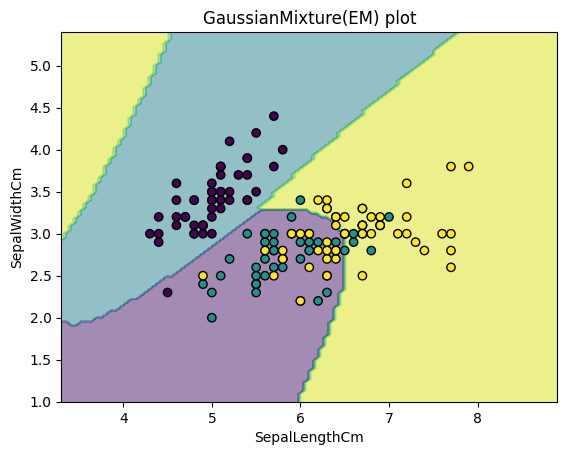

In [12]:
x=df.iloc[:,:2]
gmm=GaussianMixture(n_components=3)
gmm.fit(x)
disp=DecisionBoundaryDisplay.from_estimator(gmm,
                                        x,
                                        response_method="predict",
                                        alpha=0.5)
disp.ax_.scatter(df.iloc[:,:1], df.iloc[:,1:2], c=df['Species'].to_numpy(), edgecolor="k")
plt.title("GaussianMixture(EM) plot")
plt.plot()